# Credit Card Fraud Detection | Project Machine Learning

## 01. Data Understanding

- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

## 02. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## 03. Load and Explore Dataset

In [2]:
dataset = pd.read_csv("Credit_Card_Fraud_Detection.csv")
dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
print(f'Number of Row Dataset',dataset.shape[0])
print(f'Number of Feature Dataset',dataset.shape[1])

Number of Row Dataset 6362620
Number of Feature Dataset 11


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
dataset.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [7]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

## 05. Exploratory Data Analysis

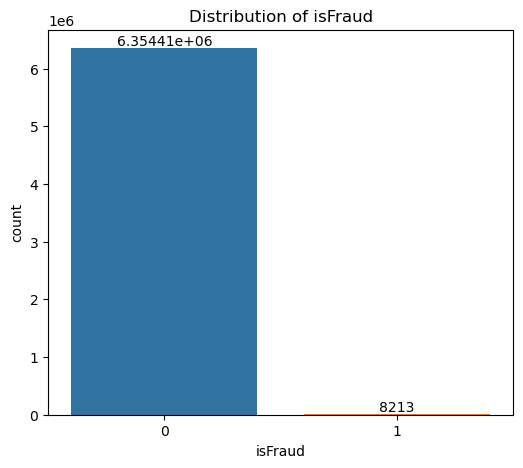

In [9]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=dataset, x='isFraud')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Distribution of {}".format('isFraud'))
plt.show()

Imbalance Data in Target

In [10]:
target_no = dataset[dataset['isFraud']==0]
target_no

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


In [11]:
target_yes = dataset[dataset['isFraud']==1]
target_yes.shape[0]

8213

In [12]:
target_no_new = target_no.sample(target_yes.shape[0])
target_no_new.shape

(8213, 11)

In [13]:
data = pd.concat([target_yes, target_no_new]).sample(frac=1, random_state=42)
data = data.drop(columns=['isFlaggedFraud','nameOrig','nameDest'])
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
608718,34,CASH_OUT,447372.28,126026.98,0.00,2318934.62,2775283.83,0
4284527,307,CASH_OUT,199242.33,0.00,0.00,1379587.27,1578829.61,0
1059489,98,CASH_OUT,8055.06,8055.06,0.00,0.00,8055.06,1
6161404,550,TRANSFER,342309.91,342309.91,0.00,0.00,0.00,1
6206417,586,CASH_OUT,2581549.92,2581549.92,0.00,0.00,2581549.92,1
...,...,...,...,...,...,...,...,...
2893142,228,CASH_OUT,442142.65,0.00,0.00,5145719.77,5587862.41,0
1228689,133,CASH_OUT,317099.41,0.00,0.00,1900686.38,2217785.79,0
6039793,484,CASH_OUT,156220.74,156220.74,0.00,0.00,156220.74,1
1030533,71,TRANSFER,1871553.73,1871553.73,0.00,0.00,0.00,1


In [14]:
## Split Feature Type

num_feature = [col for col in data.columns if data[col].dtypes in ['int64', 'float64']]
cat_feature = [col for col in data.columns if col not in num_feature]
discrete_feature = [col for col in num_feature if len(data[col].unique()) <=25]
continous_feature = [col for col in num_feature if col not in discrete_feature]

In [15]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000
mean,305.609948,8.257710e+05,1.278165e+06,5.612222e+05,8.114844e+05,1.245512e+06,0.500000
std,193.406716,1.857738e+06,3.362157e+06,2.657811e+06,3.099780e+06,3.522343e+06,0.500015
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,161.000000,3.653139e+04,1.049450e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,283.000000,1.733091e+05,1.203221e+05,0.000000e+00,0.000000e+00,1.227171e+05,0.500000
75%,408.000000,5.545227e+05,8.037581e+05,0.000000e+00,5.064431e+05,1.072254e+06,1.000000
max,743.000000,1.775666e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000


### a. Discrete Feature

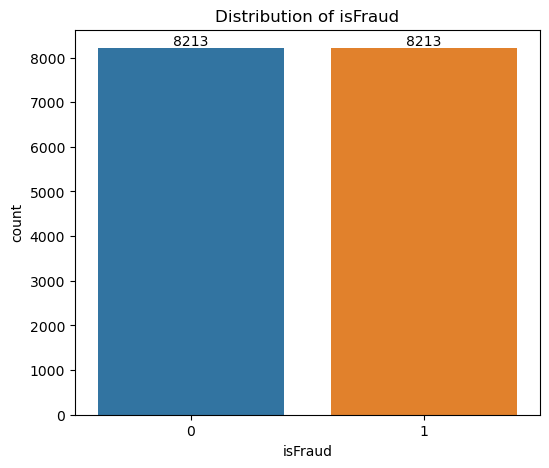

In [16]:
plt.figure(figsize=(6,5))

for abs, col in enumerate(discrete_feature,1):
    plt.subplot(1,1,abs)
    ax = sns.countplot(data=data, x=col)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.title("Distribution of {}".format(col))
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.show()

### b. Continuous Feature

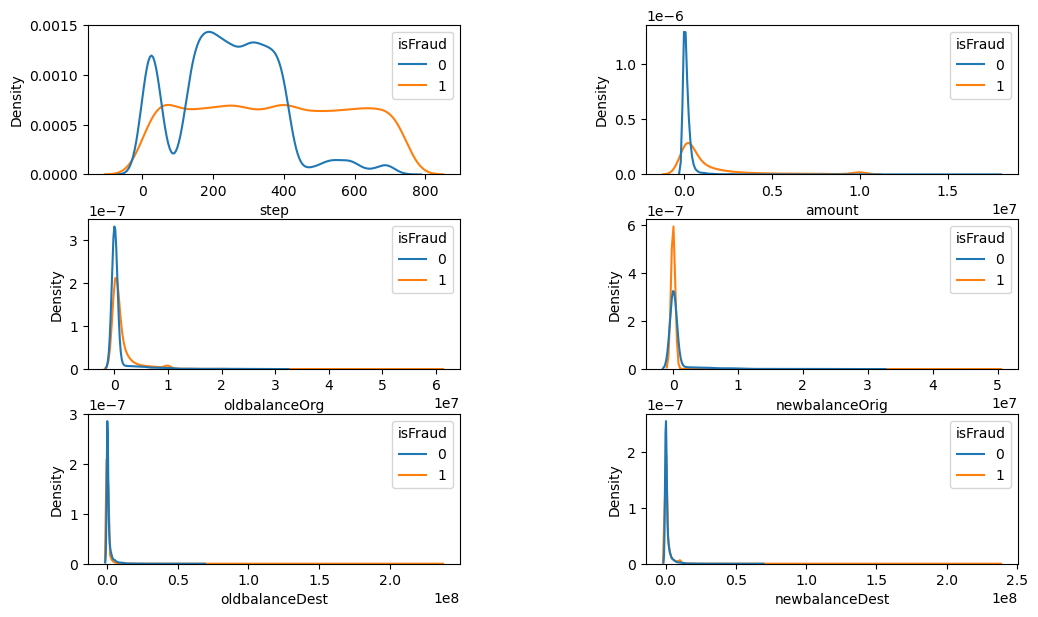

In [17]:
plt.figure(figsize=(12,7))

for i, j in enumerate(continous_feature):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=data, x=j, hue='isFraud')
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

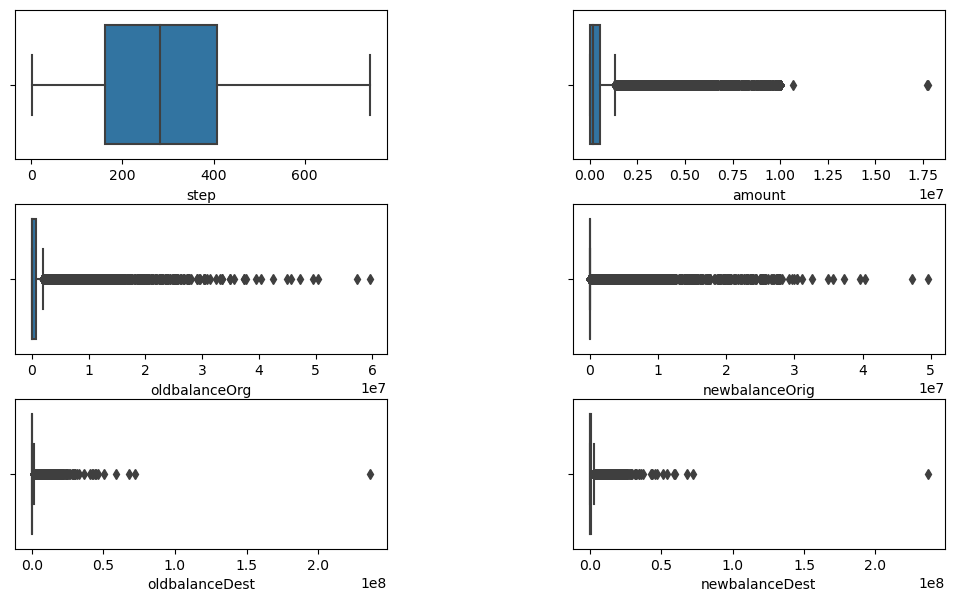

In [18]:
plt.figure(figsize=(12,7))

for i, j in enumerate(continous_feature):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=data, x=j)
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

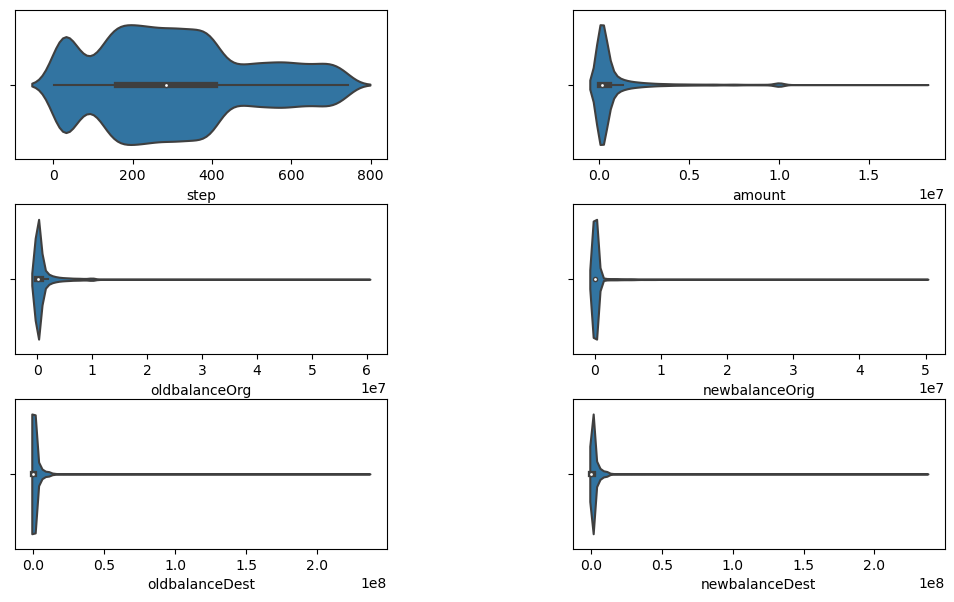

In [19]:
plt.figure(figsize=(12,7))

for i, j in enumerate(continous_feature):
    plt.subplot(3,2,i+1)
    sns.violinplot(data=data, x=j)
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

### c. Categorical Feature

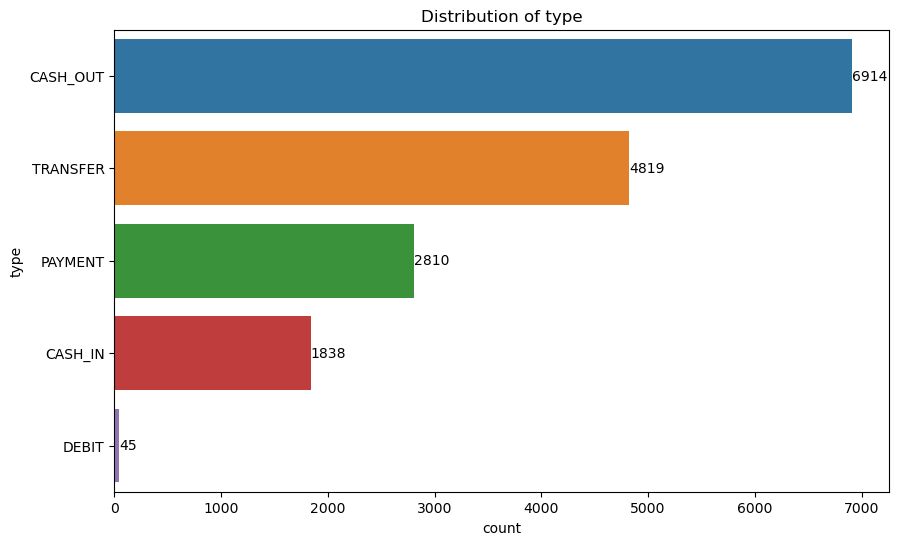

In [20]:
plt.figure(figsize=(10,6))

for abs, col in enumerate(cat_feature,1):
    plt.subplot(1,1,abs)
    ax = sns.countplot(data=data, y=col)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
    plt.title('Distribution of {}'.format(col))
plt.show()

### d. Correlation

<Figure size 1200x800 with 0 Axes>

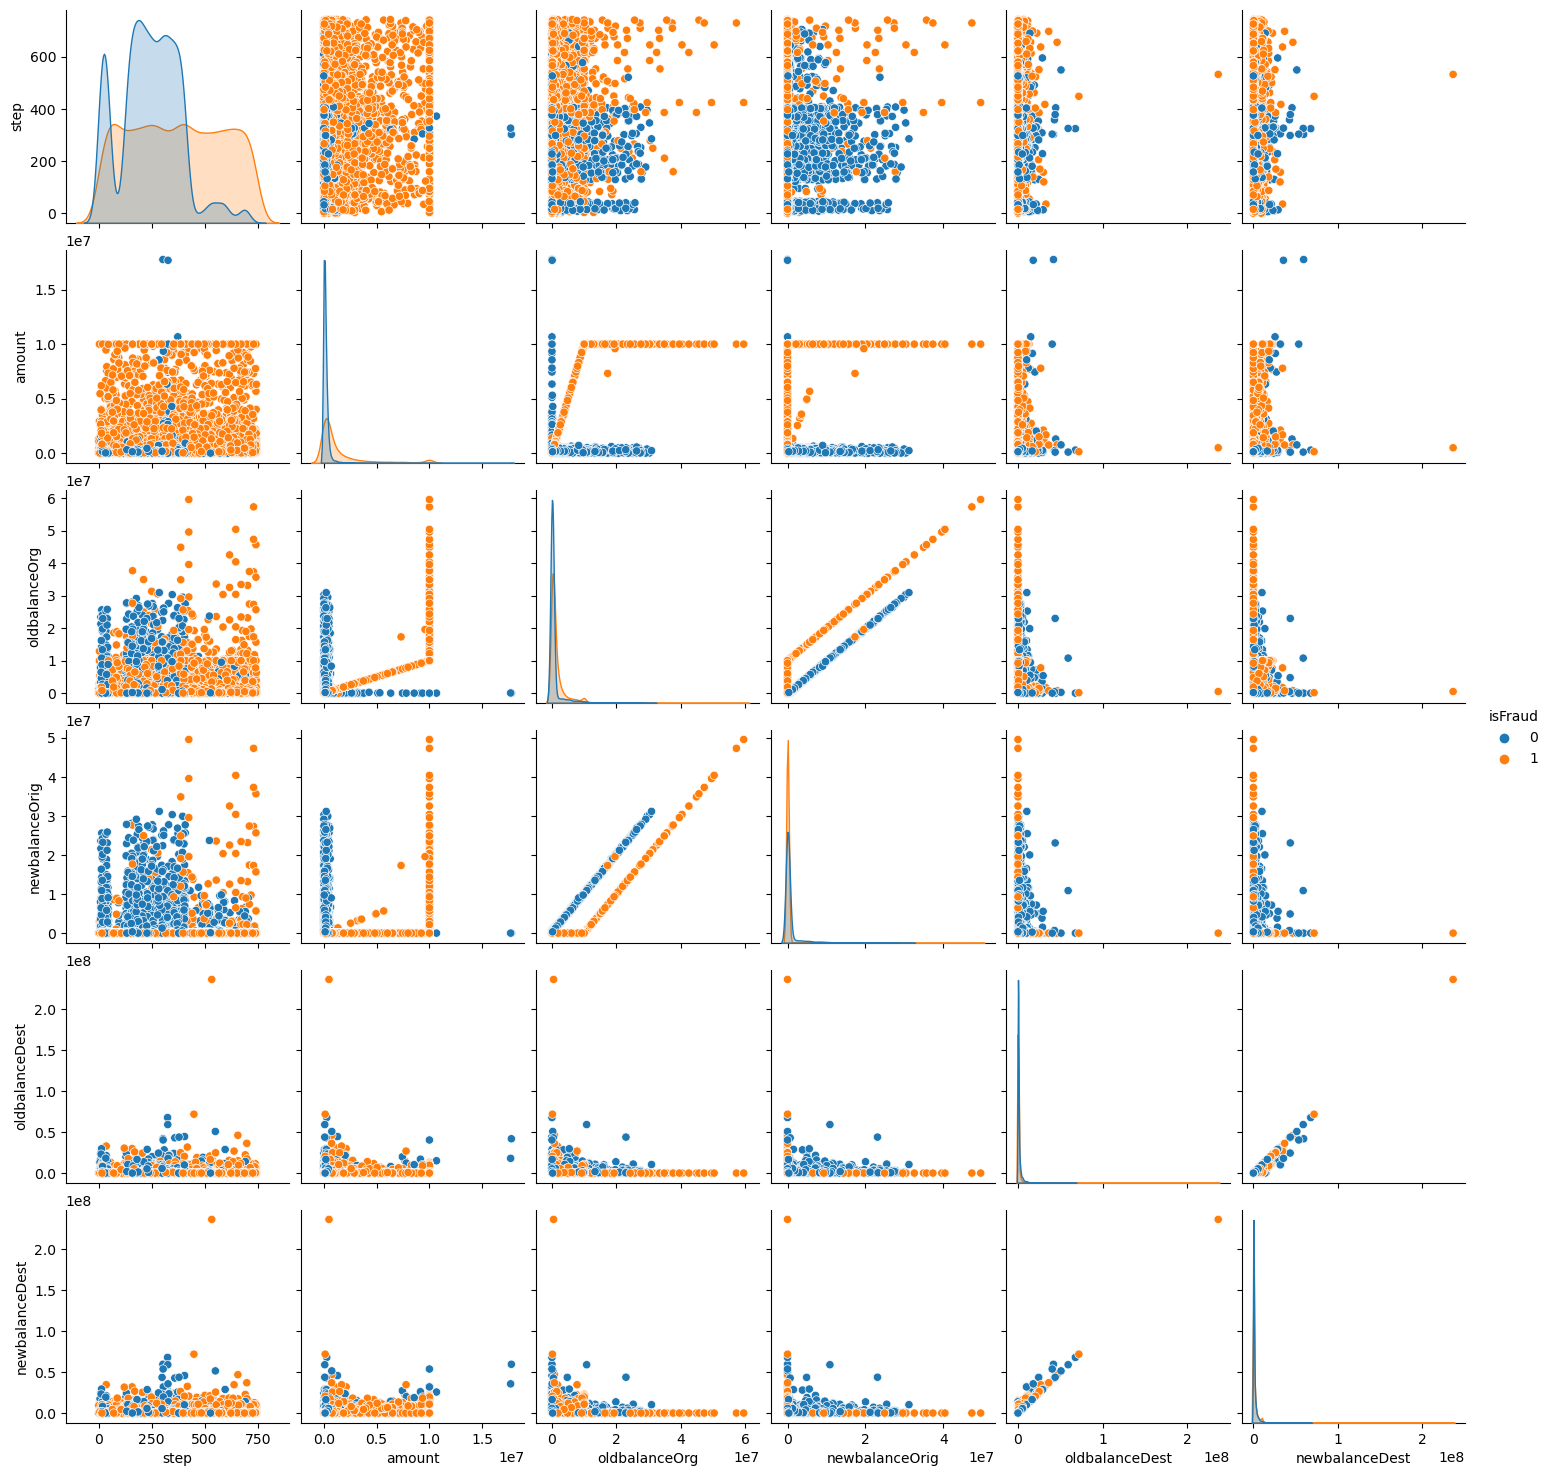

In [21]:
plt.figure(figsize=(12,8))
sns.pairplot(data=data[num_feature], hue='isFraud')
plt.show()

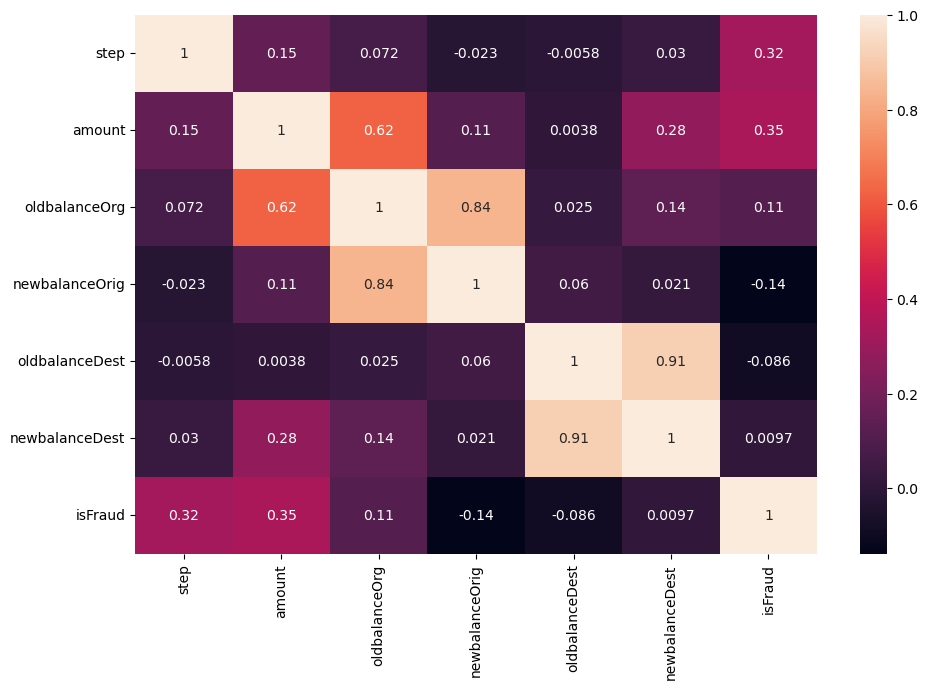

In [22]:
correlation = data[num_feature].corr()
plt.figure(figsize=(11,7))
sns.heatmap(correlation, annot=True)
plt.show()

In [23]:
correlation_abs = data[num_feature].corr().abs()
high_correlation_pair=[]
threshold = 0.7

for i in correlation_abs.columns:
    for j in correlation_abs.columns:
        if i != j and correlation_abs.loc[i,j]>threshold:
            if [j,i] not in high_correlation_pair:
                high_correlation_pair.append([i,j])

correlation_abs_sum = correlation_abs.sum()
features_to_drop = []


for sublist in high_correlation_pair:
    feature1, feature2 = sublist
    if correlation_abs_sum[feature1]>=correlation_abs_sum[feature2]:
        features_to_drop.append(feature1)
    else:
        features_to_drop.append(feature2)

In [24]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
608718,34,CASH_OUT,447372.28,126026.98,0.00,2318934.62,2775283.83,0
4284527,307,CASH_OUT,199242.33,0.00,0.00,1379587.27,1578829.61,0
1059489,98,CASH_OUT,8055.06,8055.06,0.00,0.00,8055.06,1
6161404,550,TRANSFER,342309.91,342309.91,0.00,0.00,0.00,1
6206417,586,CASH_OUT,2581549.92,2581549.92,0.00,0.00,2581549.92,1
...,...,...,...,...,...,...,...,...
2893142,228,CASH_OUT,442142.65,0.00,0.00,5145719.77,5587862.41,0
1228689,133,CASH_OUT,317099.41,0.00,0.00,1900686.38,2217785.79,0
6039793,484,CASH_OUT,156220.74,156220.74,0.00,0.00,156220.74,1
1030533,71,TRANSFER,1871553.73,1871553.73,0.00,0.00,0.00,1


In [25]:
data = data.drop(columns=features_to_drop)
data

,step,type,amount,newbalanceOrig,oldbalanceDest,isFraud
608718,34,CASH_OUT,447372.28,0.00,2318934.62,0
4284527,307,CASH_OUT,199242.33,0.00,1379587.27,0
1059489,98,CASH_OUT,8055.06,0.00,0.00,1
6161404,550,TRANSFER,342309.91,0.00,0.00,1
6206417,586,CASH_OUT,2581549.92,0.00,0.00,1
...,...,...,...,...,...,...
2893142,228,CASH_OUT,442142.65,0.00,5145719.77,0
1228689,133,CASH_OUT,317099.41,0.00,1900686.38,0
6039793,484,CASH_OUT,156220.74,0.00,0.00,1
1030533,71,TRANSFER,1871553.73,0.00,0.00,1


## 06. Feature Engineering

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [29]:
def feature_engineering(data):
    le = LabelEncoder()
    scaler = StandardScaler()
    ohe = OneHotEncoder()
    
    X = data.drop(data.columns[-1], axis=1)
    y = data[data.columns[-1]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for feature in X.columns:
        if X[feature].dtypes =='object':
            X_train[feature] = le.fit_transform(X_train[[feature]])
            X_test[feature] = le.fit_transform(X_test[[feature]])
        else:
            X_train[feature] = scaler.fit_transform(X_train[[feature]])
            X_test[feature] = scaler.fit_transform(X_test[[feature]])
    if y.dtype=='object':
        y_train = le.fit_transform(y_train)
        y_test = le.fit_transform(y_test)
    else:
        y_train = y_train
        y_test = y_test
        
    return X_train, X_test, y_train, y_test

In [47]:
X_train = feature_engineering(data)[0]
X_test = feature_engineering(data)[1]
y_train = feature_engineering(data)[2]
y_test = feature_engineering(data)[3]

In [59]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

## 07. Model Development

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
feature_importance = dt.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature':X_train.columns,
    'Feature Importance': feature_importance
}). sort_values(by='Feature Importance', ascending=False)
feature_importance_df

,Feature,Feature Importance
3,newbalanceOrig,0.243286
0,step,0.231632
2,amount,0.218610
1,type,0.173495
4,oldbalanceDest,0.132977


In [54]:
y_predict = dt.predict(X_test)
y_predict

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

clf = classification_report(y_test, y_predict)
print(clf)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1622
           1       0.91      0.91      0.91      1664

    accuracy                           0.90      3286
   macro avg       0.90      0.90      0.90      3286
weighted avg       0.90      0.90      0.90      3286



## 08. Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score

dt_cv_accuracy = cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()
dt_cv_precision = cross_val_score(dt, X, y, cv=5, scoring='precision').mean()
dt_cv_recall = cross_val_score(dt, X, y, cv=5, scoring='recall').mean()
dt_cv_f1 = cross_val_score(dt, X, y, cv=5, scoring='f1').mean()

print('Decision Tree Classifier with Cross Validation')
print(f'Accuracy = ', round(dt_cv_accuracy*100, 2), '%')
print(f'Precision = ', round(dt_cv_precision*100, 2), '%')
print(f'Recall = ', round(dt_cv_recall*100, 2), '%')
print(f'f1 score = ', round(dt_cv_f1*100, 2), '%')

Decision Tree Classifier with Cross Validation
Accuracy =  90.62 %
Precision =  90.24 %
Recall =  90.6 %
f1 score =  90.73 %


## 09. Hyperparameter Tunning

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']}

grid_seacrh = GridSearchCV(estimator = dt, param_grid = param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_seacrh.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [90]:
grid_seacrh.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [91]:
grid_seacrh.best_score_

0.921917808219178

## 10. Build New Model With Best Parameters

In [92]:
dt_tunning = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=10,
                                   max_features=None,
                                   min_samples_leaf=1,
                                   min_samples_split=5)
dt_tunning.fit(X_train, y_train)
y_pred = dt_tunning.predict(X_test)
clf_dt_tunning = classification_report(y_test, y_pred)
print(clf_dt_tunning)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1622
           1       0.95      0.89      0.92      1664

    accuracy                           0.92      3286
   macro avg       0.92      0.92      0.92      3286
weighted avg       0.92      0.92      0.92      3286



Copyright by ahmadalfianfaisal04@gmail.com